In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/karen_building_blocks_analysis'

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.archetypes import ArchetypalAnalysis
from src.utils.visualization import radius_pc_all_variance, radius_pc_variance_contourf, radius_pc_heatmap, plot_scatter_pca, plot_3Dscatter_pca, archetypes_bar_plot, archetype_simple_plot
from src.utils.equations import arch2color, alfa2rgb, scale, color_mapper

In [3]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']

full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
METHOD = 'gaussian'
N_SITE = 100
RADIUS = 25
ROOT_DATA_PATH = "../../data/cell_positions_data"

PC_components = 3

## Divide by Average

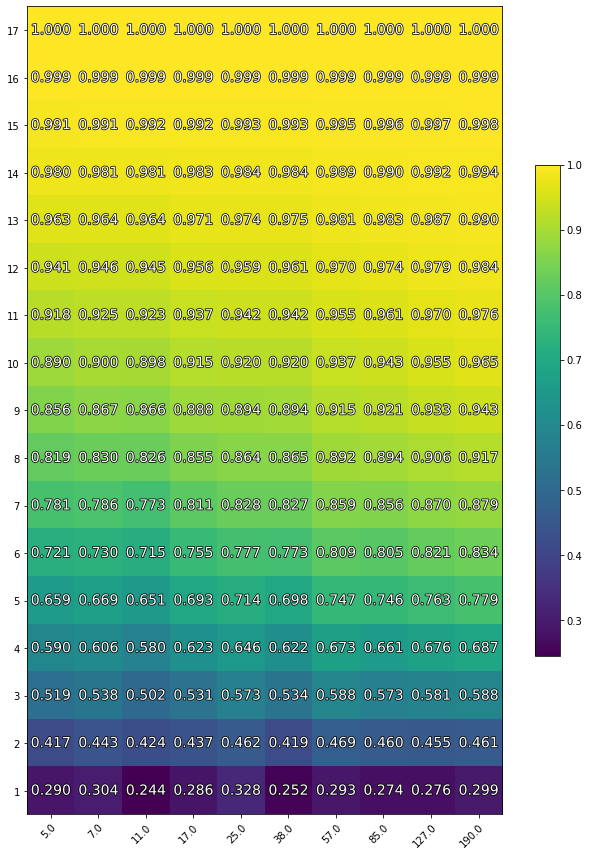

In [4]:
%matplotlib inline
radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

expl_var_ratio_gauss = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids, _ = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    sites = sites / sites.mean(0)
    pc = pca.fit_transform(sites)
    expl_var_ratio_gauss[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio_gauss)
radius_pc_all_variance(expl_var_ratio_gauss)

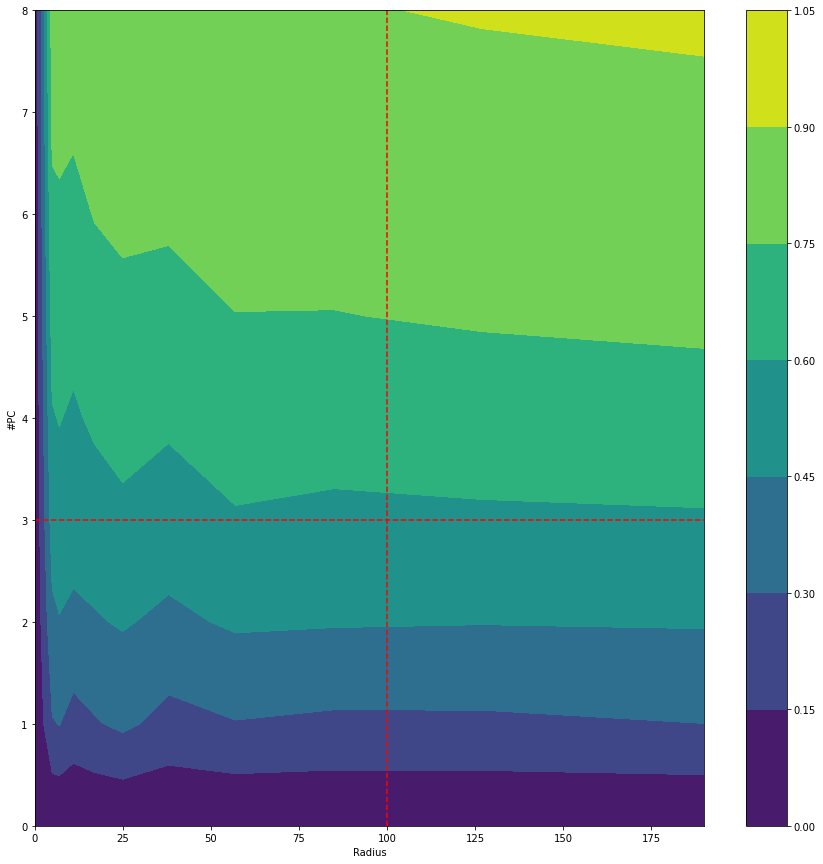

In [5]:
radius_pc_all_variance(expl_var_ratio_gauss)

In [8]:
RADIUS = 25

In [15]:
PC_components = 3
abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method=METHOD, snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)
sites_avg = sites / sites.mean(0)
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites_avg)
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
original_axis_avg = np.zeros((18, 17))
np.fill_diagonal(original_axis_avg, np.array(sites_avg).max(0))
original_axis_pc_avg = pca_3d.transform(original_axis_avg)

0.56% Total Exp. Var.


<IPython.core.display.Javascript object>


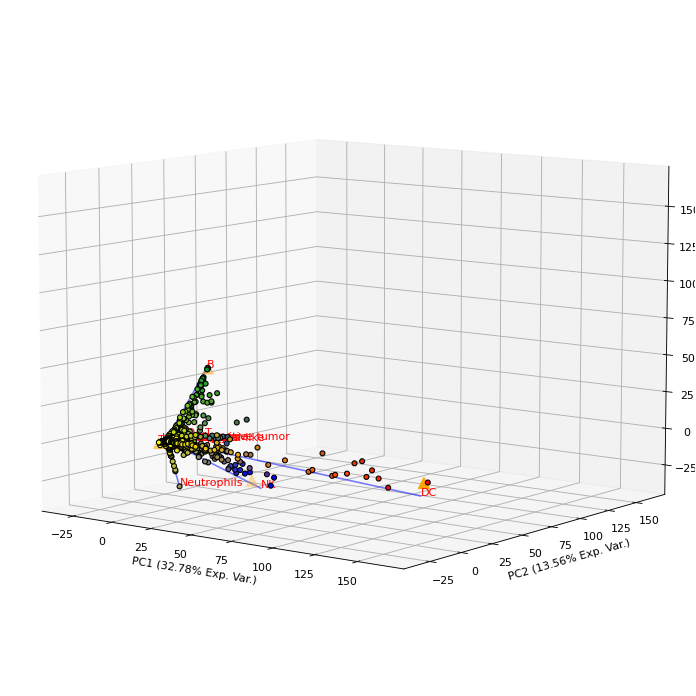

In [13]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes, original_axis=original_axis_pc_avg, cell_type=CELL_TYPES)
plt.show()

0.56% Total Exp. Var.


<IPython.core.display.Javascript object>


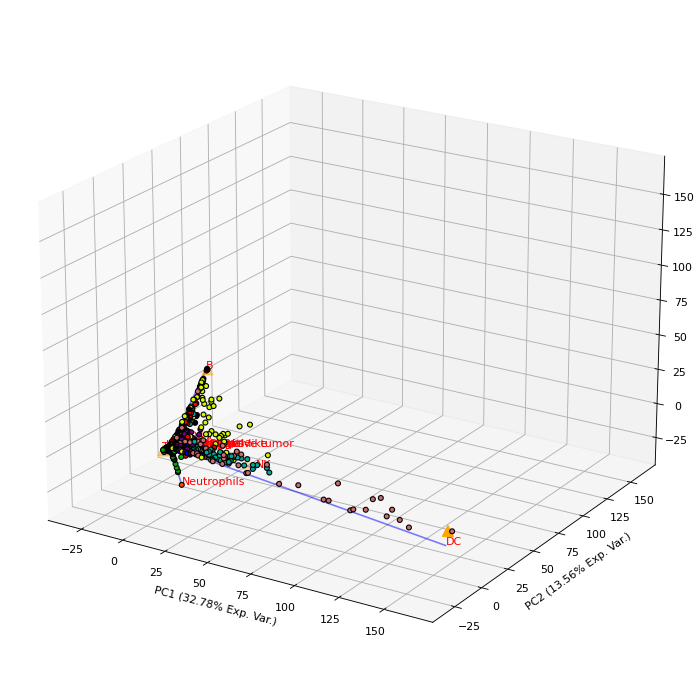

In [12]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=patients_ids, archetypes=AA_3D.archetypes, original_axis=original_axis_pc_avg, cell_type=CELL_TYPES)
plt.show()

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48]

[-2, -1, 0, 1]


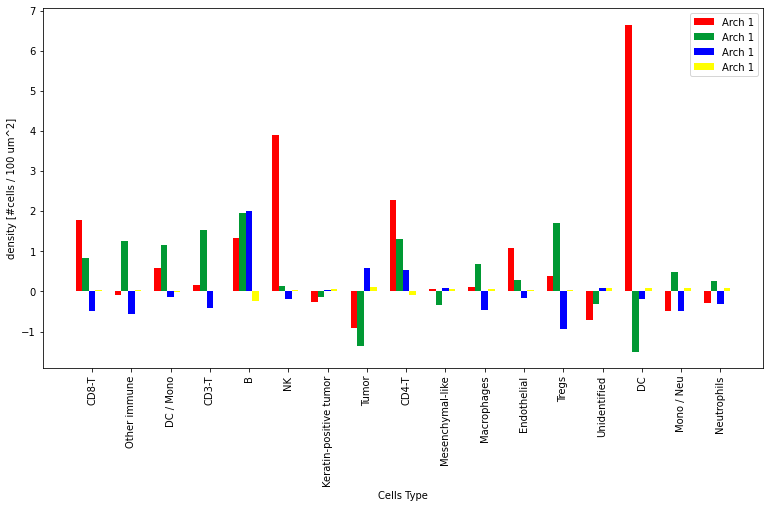

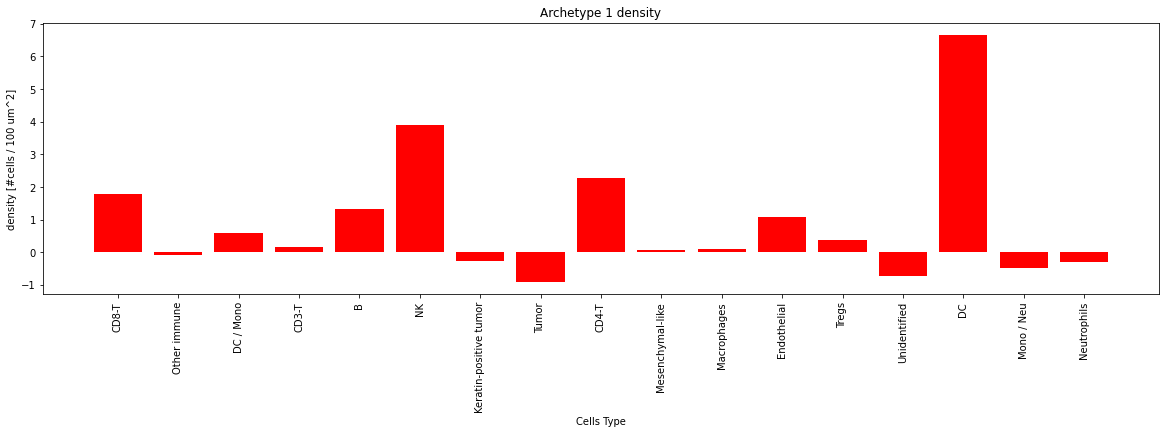

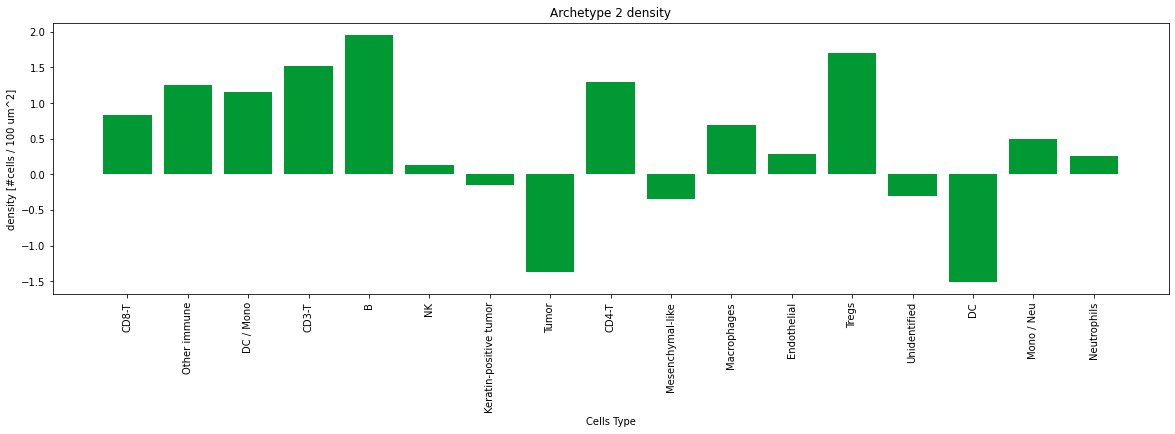

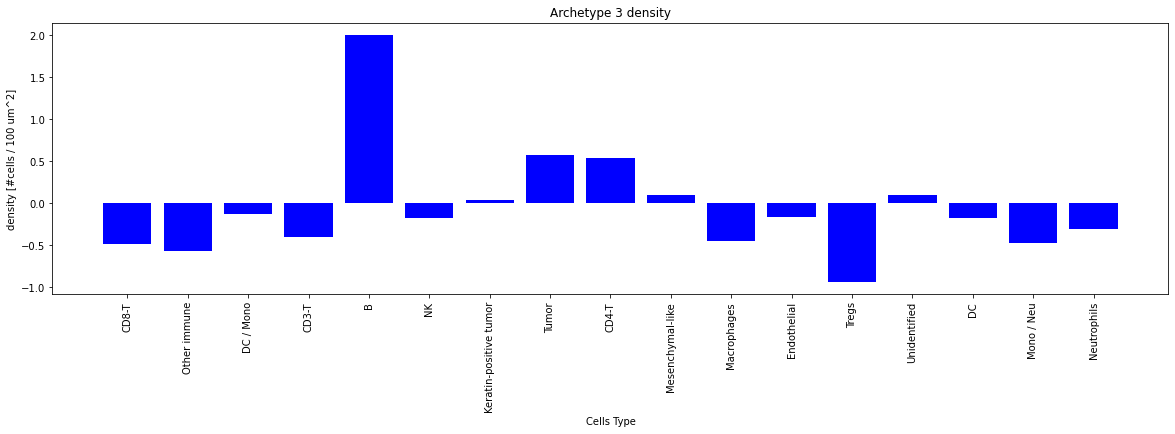

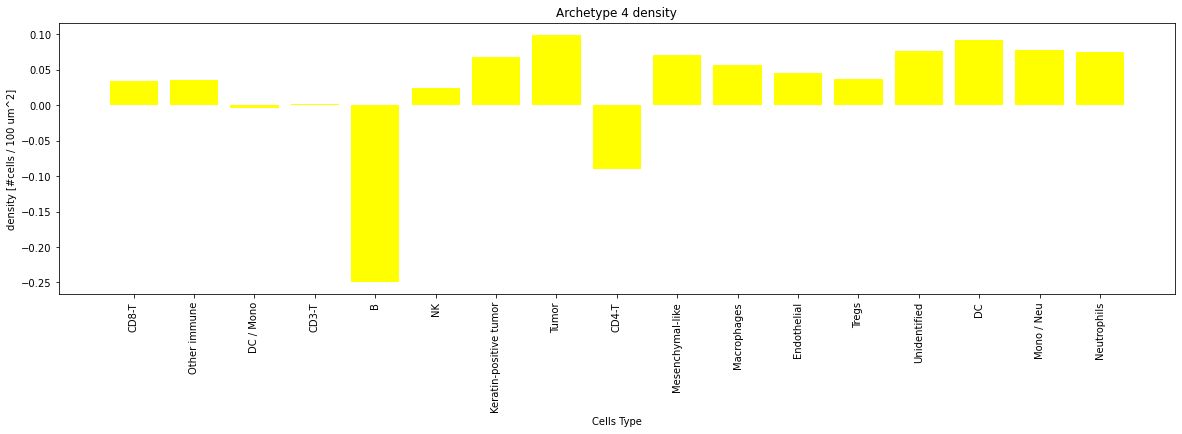

In [8]:
%matplotlib inline
res = np.dot(AA_3D.archetypes.T, pca.components_[:PC_components,:])+np.mean(sites_avg, axis=0)
archetype_colors = [[1., 0., 0.], [0. , 0.6, 0.2], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density', radius=RADIUS)

## Divide by mean and log

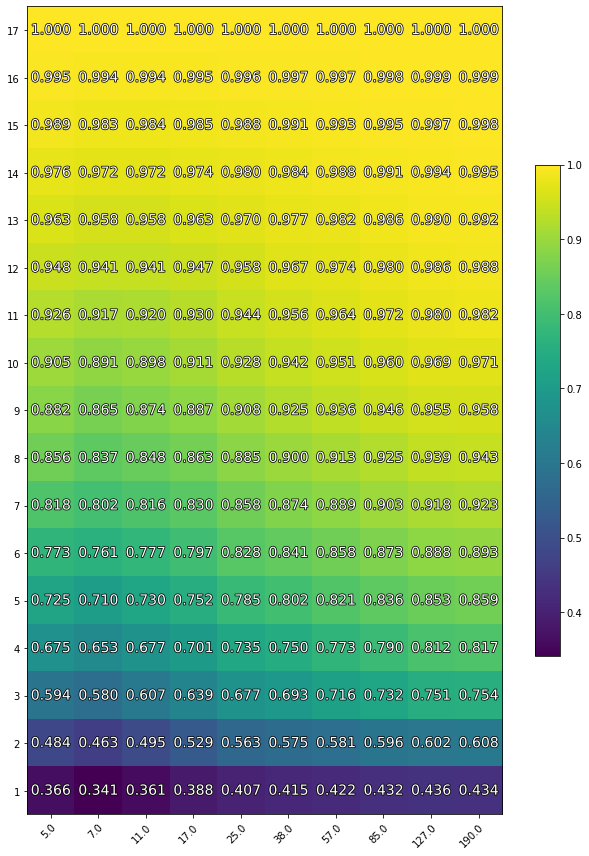

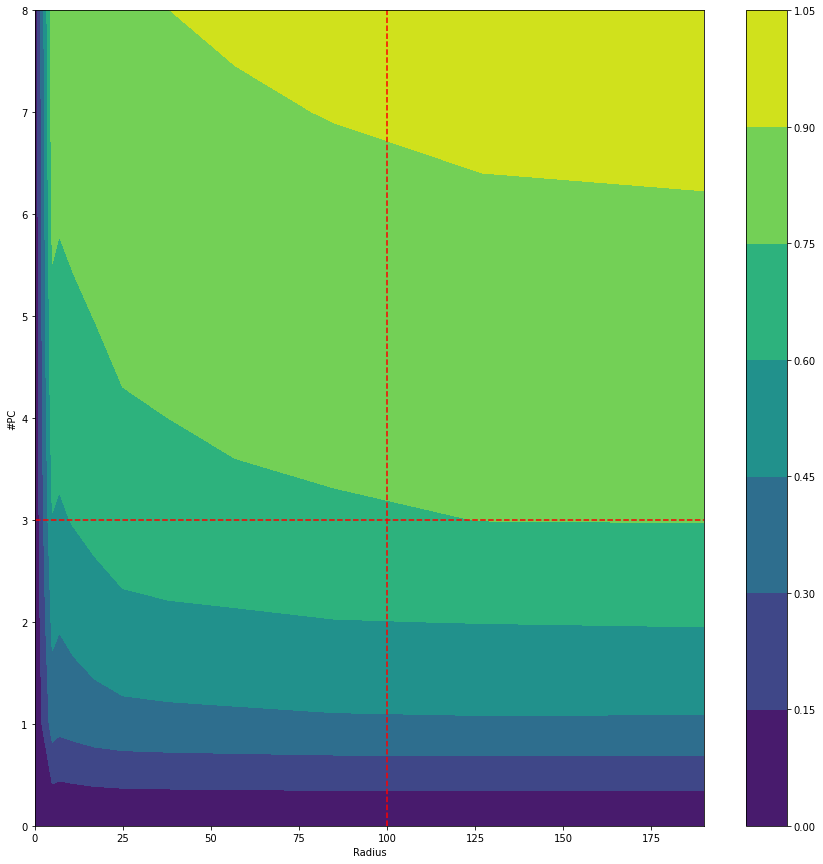

In [43]:
%matplotlib inline
radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

expl_var_ratio_gauss = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids, _ = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    sites = np.log((sites / sites.mean(0))+(1/(np.pi*RADIUS**2*sites.mean(0))))
    pc = pca.fit_transform(sites)
    expl_var_ratio_gauss[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio_gauss)
radius_pc_all_variance(expl_var_ratio_gauss)

In [20]:
RADIUS = 25

In [39]:
PC_components = 3
abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method=METHOD, snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)
sites_avg = np.log((sites / sites.mean(0))+(1/(np.pi*RADIUS**2*sites.mean(0))))
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites_avg)
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]

original_axis_avg = np.zeros((18, 17)) - np.log(np.pi*RADIUS**2*sites.mean(0))
np.fill_diagonal(original_axis_avg, np.log((np.array(sites_avg).max(0) + 1)/(np.pi*RADIUS**2*sites.mean(0))))
original_axis_pc_avg = pca_3d.transform(original_axis_avg)

0.67% Total Exp. Var.


<IPython.core.display.Javascript object>


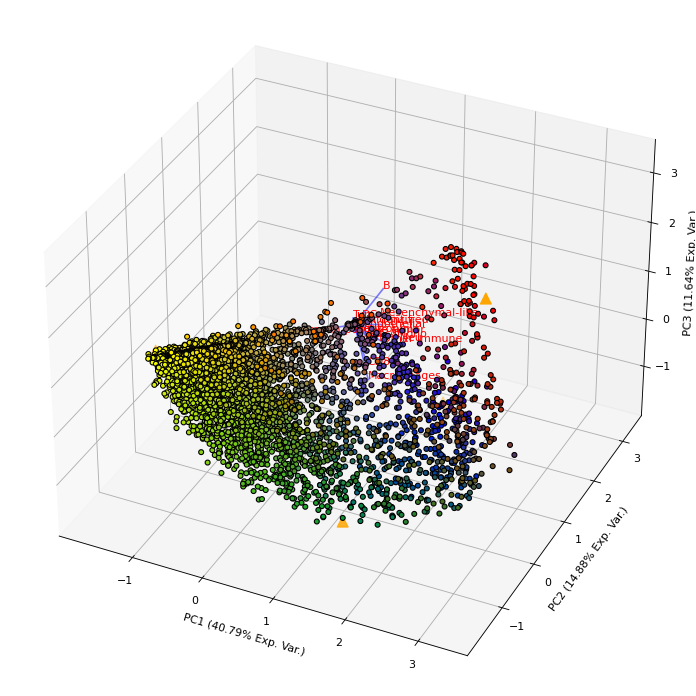

In [42]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes, original_axis=original_axis_pc_avg, cell_type=CELL_TYPES)
plt.show()

0.67% Total Exp. Var.


<IPython.core.display.Javascript object>


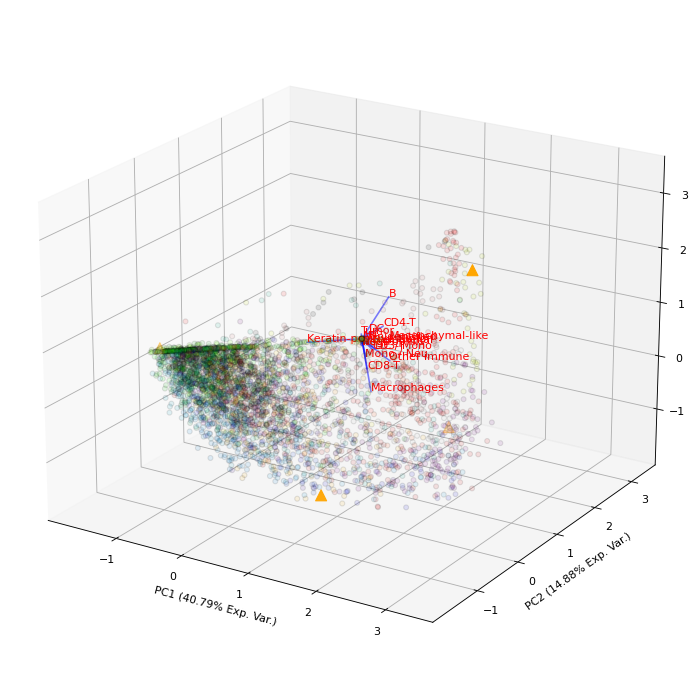

In [50]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=patients_ids, archetypes=AA_3D.archetypes, original_axis=original_axis_pc_avg, cell_type=CELL_TYPES)
plt.show()

0.67% Total Exp. Var.


<IPython.core.display.Javascript object>


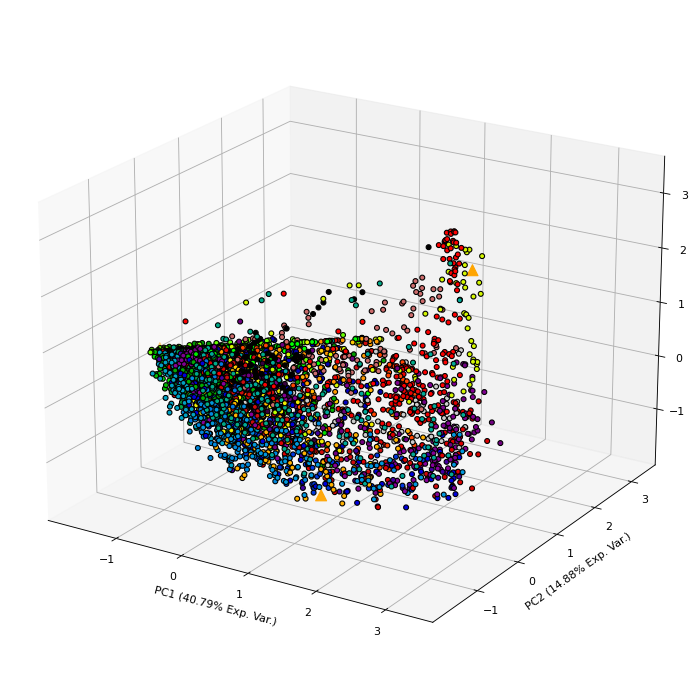

In [51]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=patients_ids, archetypes=AA_3D.archetypes, original_axis=None, cell_type=CELL_TYPES)
plt.show()

## Standardization: removing avg dividind by std dev. 

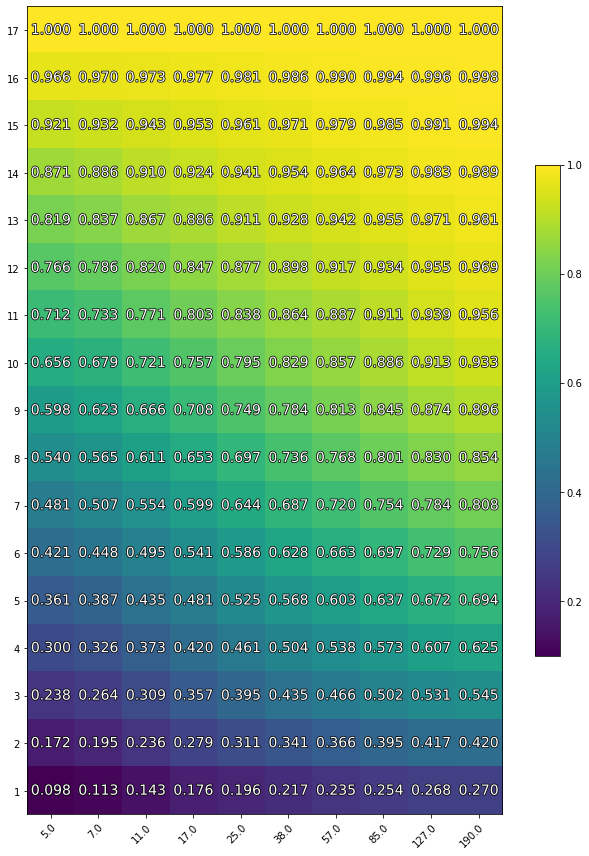

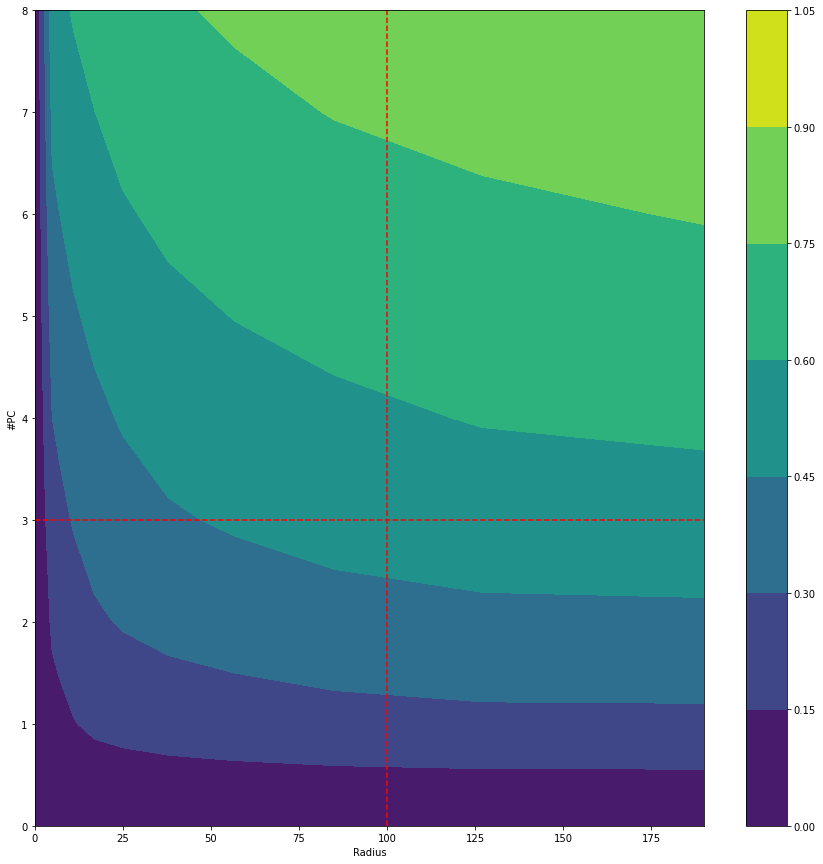

In [39]:
%matplotlib inline
radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

expl_var_ratio_gauss = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids, _ = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    sites_std = (sites - sites.mean(0)) / sites.std(0)
    pc = pca.fit_transform(sites_std)
    expl_var_ratio_gauss[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio_gauss)
radius_pc_all_variance(expl_var_ratio_gauss)

In [61]:
RADIUS = 25

In [62]:
PC_components = 3
abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method=METHOD, snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)
sites_std = (sites - sites.mean(0)) / sites.std(0)
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites_std)
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
original_axis_std = np.zeros((18, 17))
np.fill_diagonal(original_axis_std, np.array(sites_std).max(0))
original_axis_pc_std = pca_3d.transform(original_axis_std)

0.39% Total Exp. Var.


<IPython.core.display.Javascript object>


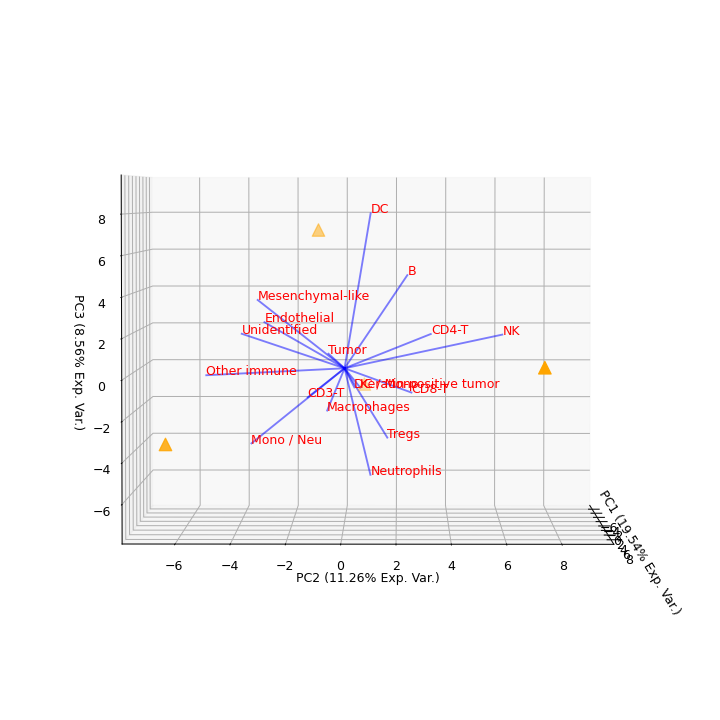

In [65]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes, original_axis=original_axis_pc_std, cell_type=CELL_TYPES)
plt.show()

0.39% Total Exp. Var.


<IPython.core.display.Javascript object>


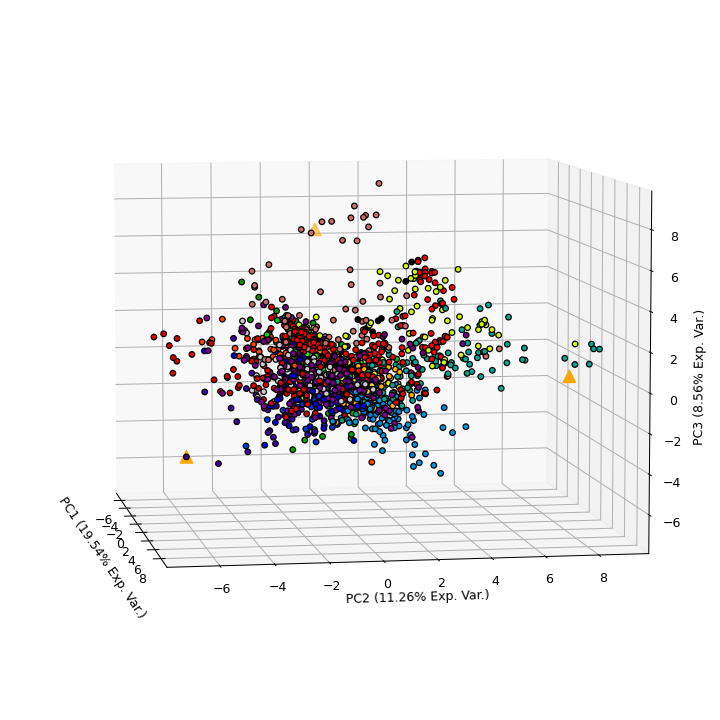

In [64]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=patients_ids, archetypes=AA_3D.archetypes, original_axis=None, cell_type=CELL_TYPES)
plt.show()

0.51% Total Exp. Var.


<IPython.core.display.Javascript object>


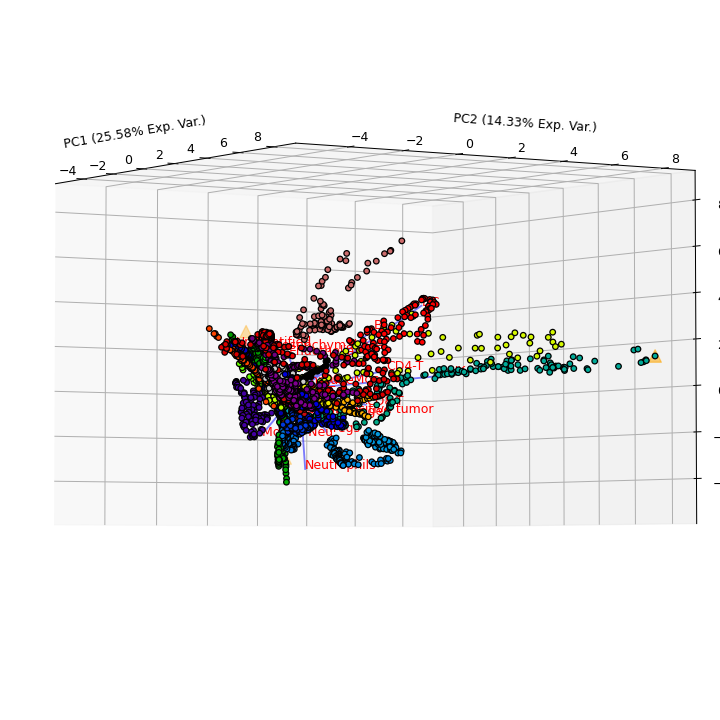

In [48]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=patients_ids, archetypes=AA_3D.archetypes, original_axis=original_axis_pc_std, cell_type=CELL_TYPES)
plt.show()

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48]

[-2, -1, 0, 1]


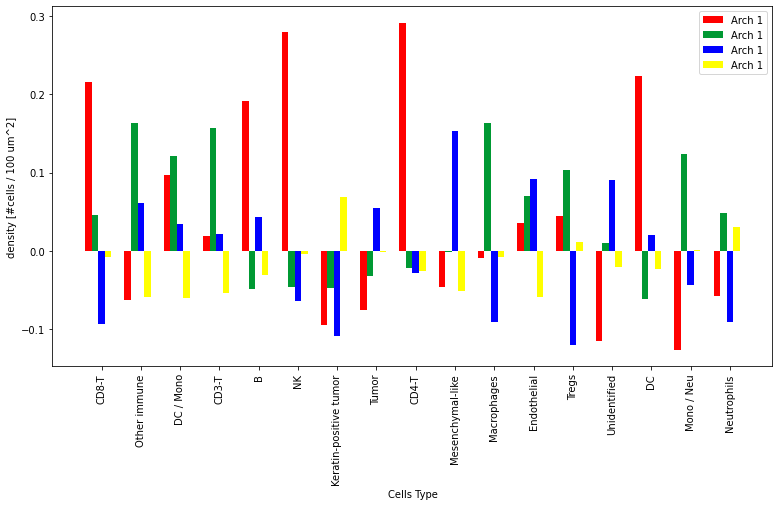

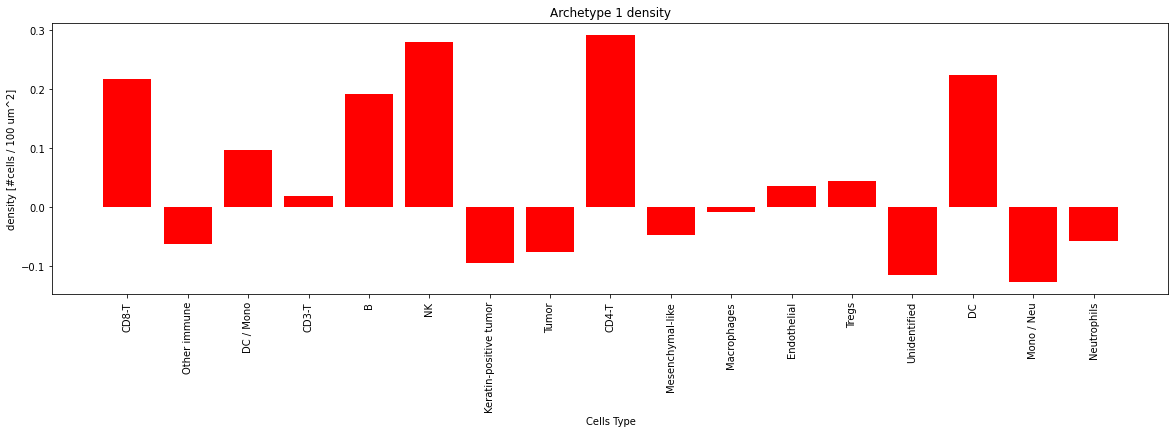

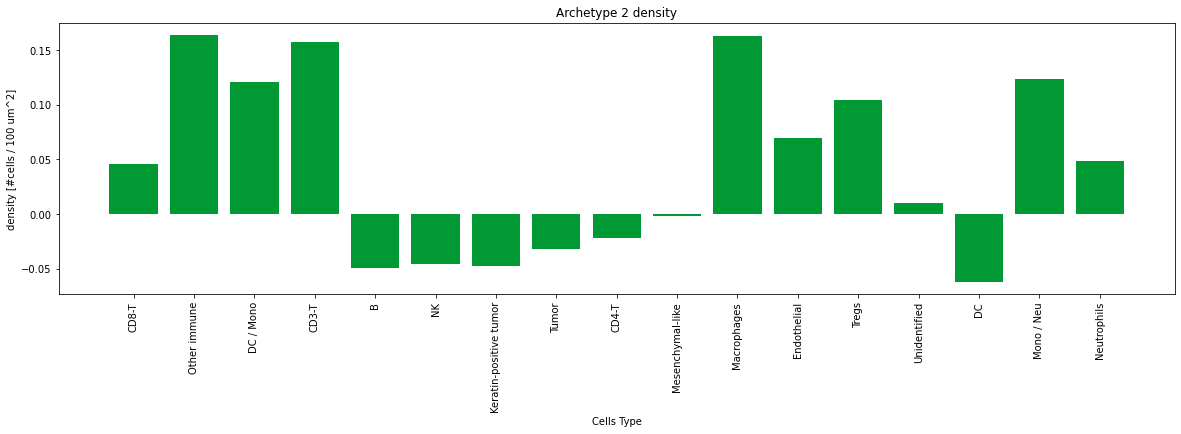

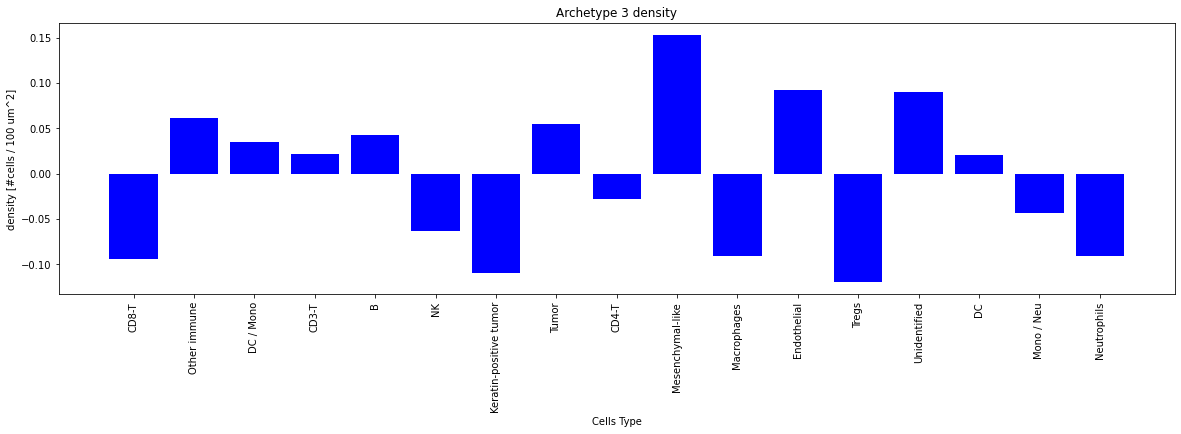

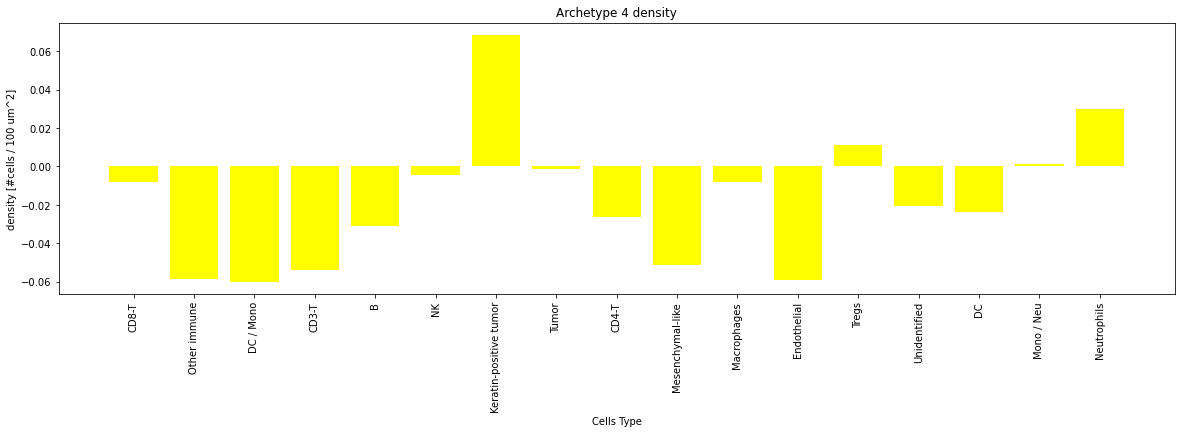

In [42]:
%matplotlib inline
res = np.dot(AA_3D.archetypes.T, pca.components_[:PC_components,:])+np.mean(sites_std, axis=0)
archetype_colors = [[1., 0., 0.], [0. , 0.6, 0.2], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density', radius=RADIUS)

## Log( counts + K ), K = 9

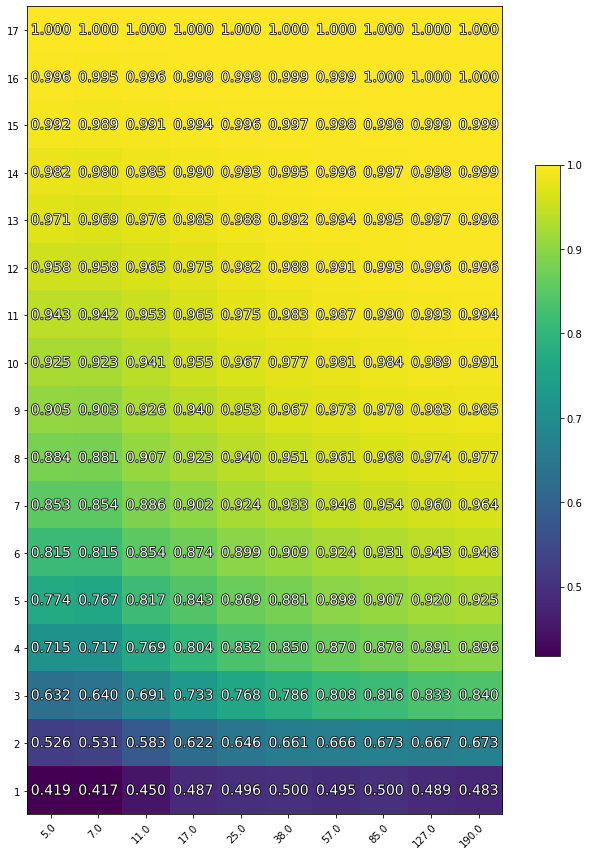

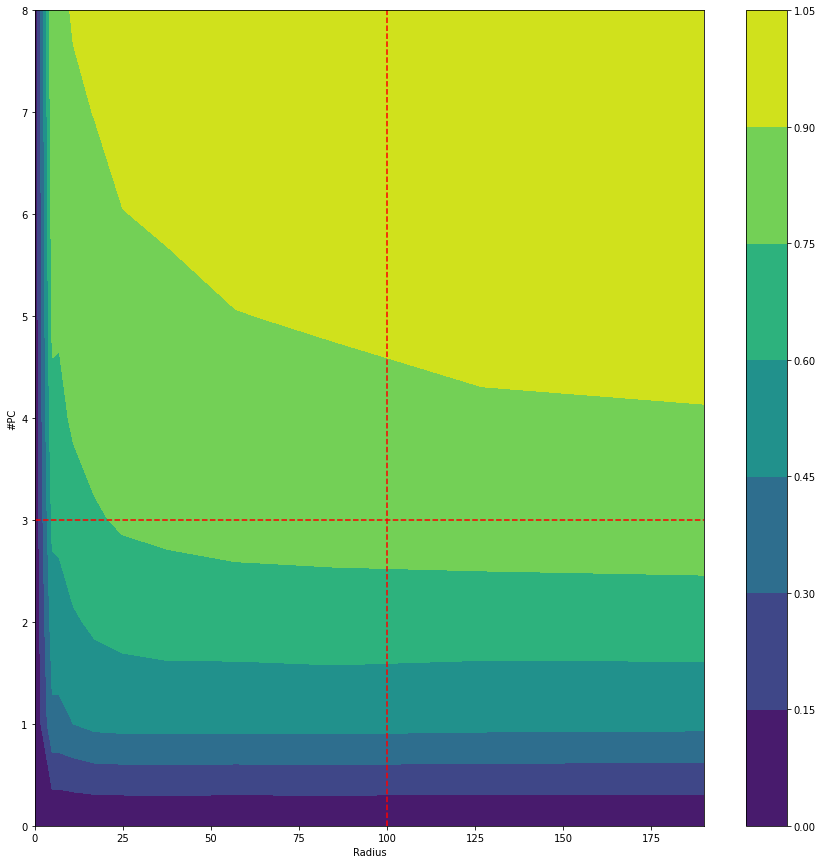

In [71]:
%matplotlib inline
radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

expl_var_ratio_gauss = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids, _ = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    sites_log = np.log((sites+(9/(np.pi*RADIUS**2))))
    pc = pca.fit_transform(sites_log)
    expl_var_ratio_gauss[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio_gauss)
radius_pc_all_variance(expl_var_ratio_gauss)

In [73]:
PC_components = 3
abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method=METHOD, snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)
sites_log = np.log((sites+(9/(np.pi*RADIUS**2))))
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites_log)
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]

original_axis_avg = np.zeros((18, 17)) + np.log(9/(np.pi*RADIUS**2))
np.fill_diagonal(original_axis_avg, np.log((np.array(sites_log).max(0) + 9)/(np.pi*RADIUS**2)))
original_axis_pc_avg = pca_3d.transform(original_axis_avg)

In [89]:
np.sum((sites > K))

1299

0.76% Total Exp. Var.


<IPython.core.display.Javascript object>


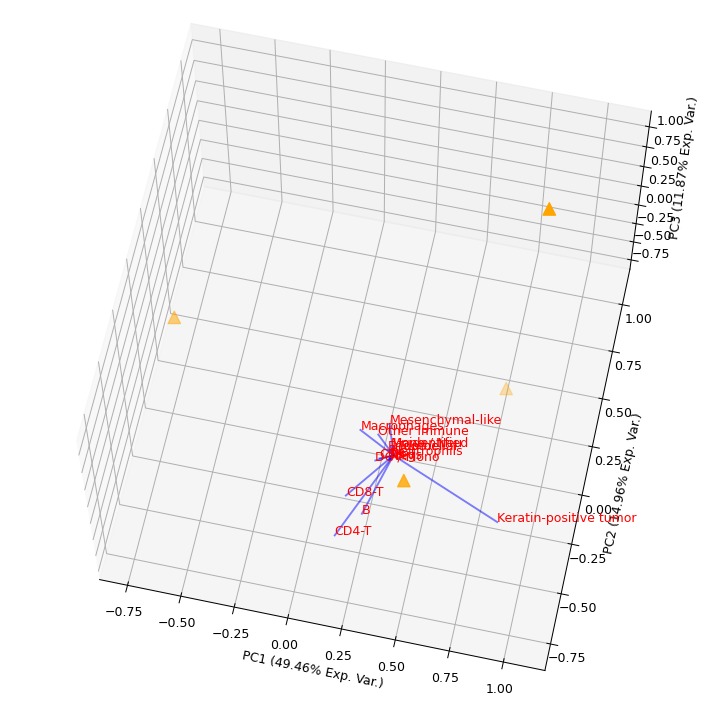

In [75]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes, original_axis=original_axis_pc_avg, cell_type=CELL_TYPES)
plt.show()

0.76% Total Exp. Var.


<IPython.core.display.Javascript object>


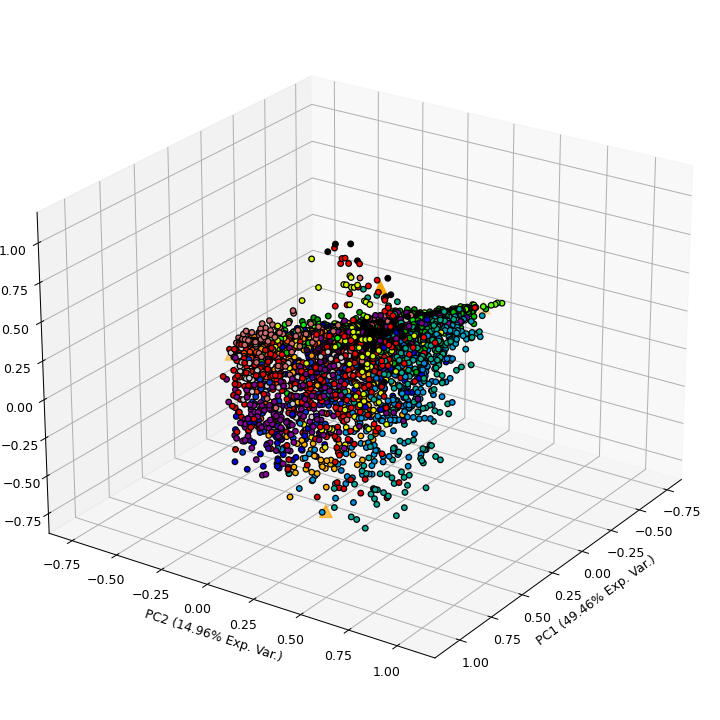

In [76]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=patients_ids, archetypes=AA_3D.archetypes, original_axis=None, cell_type=CELL_TYPES)
plt.show()

In [67]:
np.dot(AA_3D.archetypes.T, pca.components_[:PC_components,:])#+np.mean(sites_log, axis=0)
sites_log

array([[2.19723422, 2.19724907, 2.19724716, ..., 2.19722458, 2.19722458,
        2.19722998],
       [2.19722458, 2.19732508, 2.19722458, ..., 2.19722458, 2.19722458,
        2.19722458],
       [2.19724825, 2.19722458, 2.19724229, ..., 2.19722458, 2.19722458,
        2.19722458],
       ...,
       [2.19722458, 2.19727159, 2.19725273, ..., 2.19722458, 2.19727524,
        2.19732325],
       [2.19728514, 2.19727419, 2.19733791, ..., 2.19722458, 2.19723041,
        2.19725609],
       [2.19722458, 2.19723595, 2.19724977, ..., 2.19722458, 2.19723634,
        2.19722458]])

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48]

[-2, -1, 0, 1]


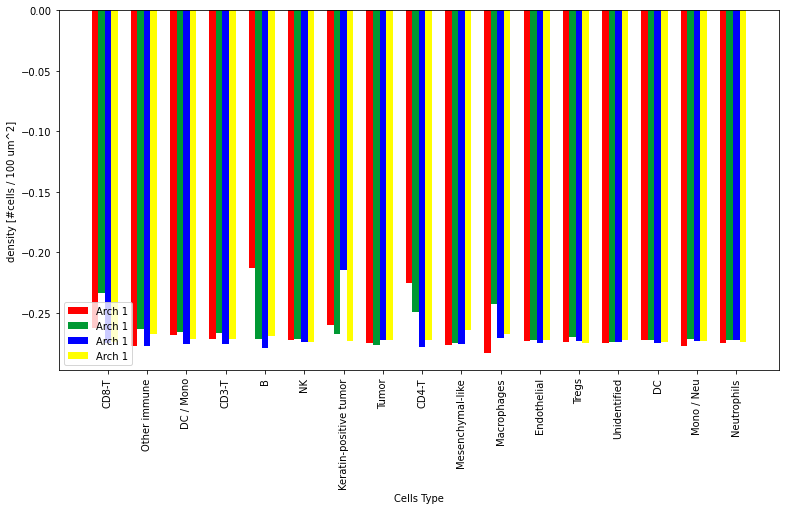

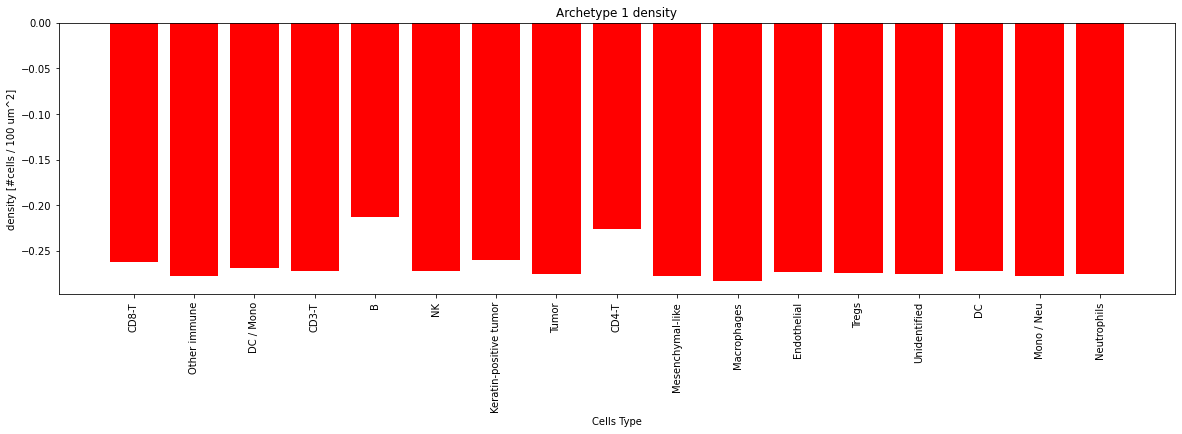

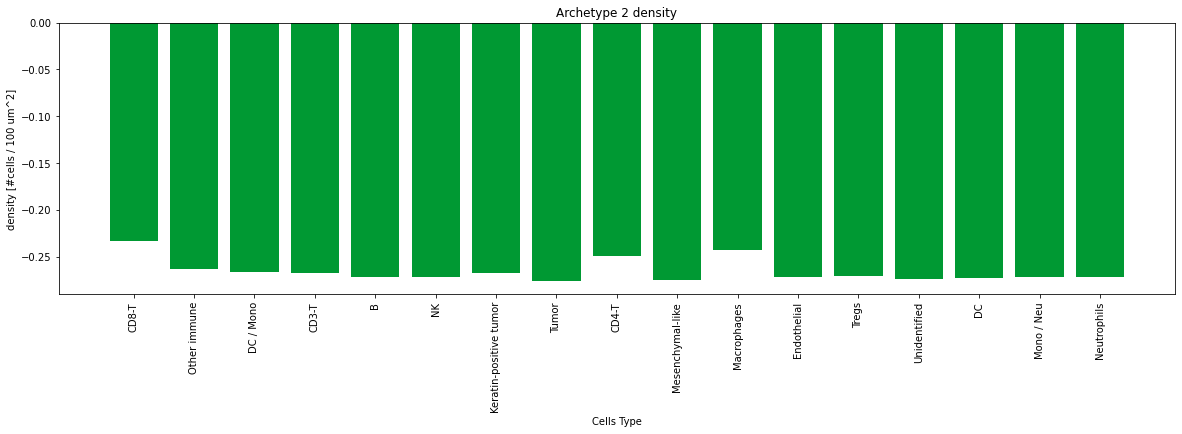

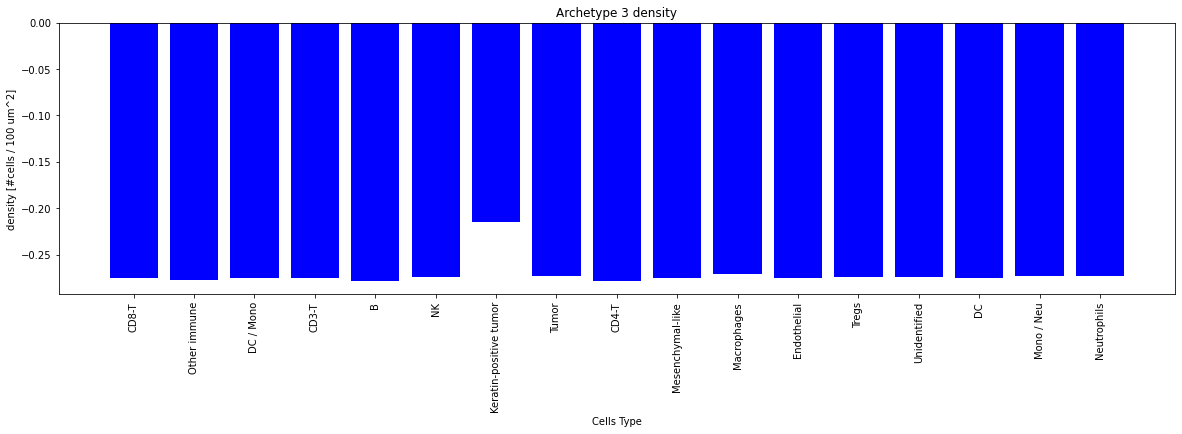

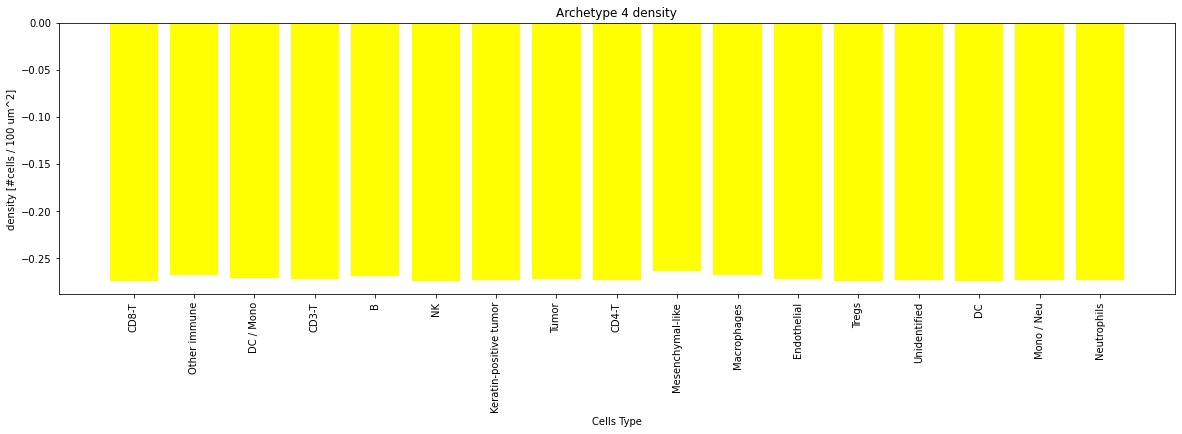

In [78]:
%matplotlib inline
res = np.dot(AA_3D.archetypes.T, pca.components_[:PC_components,:])+np.mean(sites_log, axis=0)
archetype_colors = [[1., 0., 0.], [0. , 0.6, 0.2], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density', radius=RADIUS)

In [59]:
res

array([[2.19827537, 2.19715844, 2.19731071, 2.19728787, 2.19763425,
        2.19728039, 2.19891622, 2.19715262, 2.19814441, 2.19687474,
        2.19756175, 2.19719977, 2.19731478, 2.19717524, 2.1972591 ,
        2.19722885, 2.19725798],
       [2.19663905, 2.19710182, 2.19717585, 2.19716099, 2.19770544,
        2.19720228, 2.19820428, 2.19727367, 2.19720441, 2.19726846,
        2.19682854, 2.19721527, 2.19717931, 2.1972326 , 2.19721235,
        2.1971976 , 2.19722022],
       [2.19742628, 2.19730032, 2.1972917 , 2.19727268, 2.19753603,
        2.19723707, 2.19697282, 2.19722329, 2.19753072, 2.19728357,
        2.19734528, 2.19724675, 2.19723205, 2.19723166, 2.19724077,
        2.19722883, 2.19722775],
       [2.19724427, 2.19724293, 2.19721996, 2.19722567, 2.19700132,
        2.19722215, 2.1979197 , 2.19724477, 2.19708488, 2.19725367,
        2.19734   , 2.1972266 , 2.19723119, 2.19723193, 2.19722364,
        2.19724804, 2.19724384]])

## Log( counts + K ), K = 1

In [24]:
K = 1

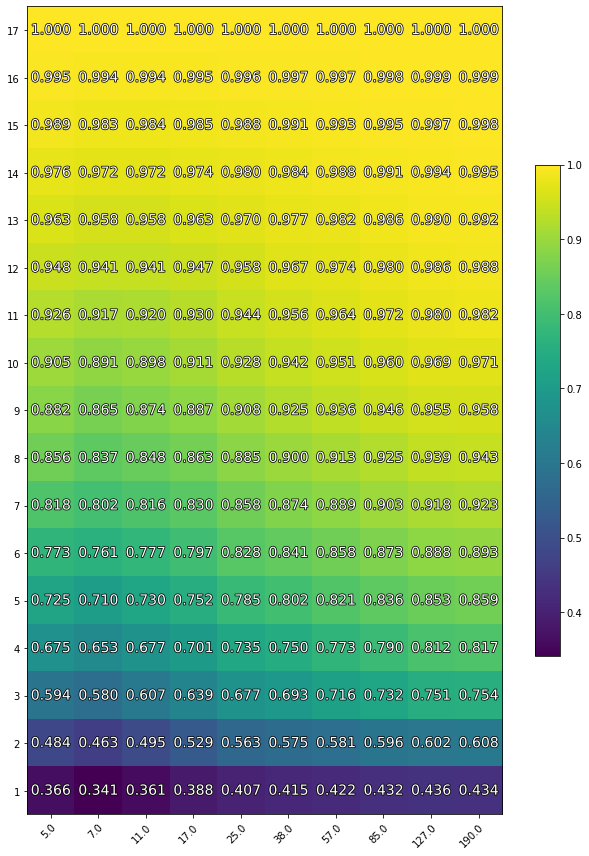

In [66]:
%matplotlib inline
radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

expl_var_ratio_gauss = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids, _ = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    sites_log = np.log(sites + 1/(np.pi*RADIUS**2))
    pc = pca.fit_transform(sites_log)
    expl_var_ratio_gauss[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio_gauss)

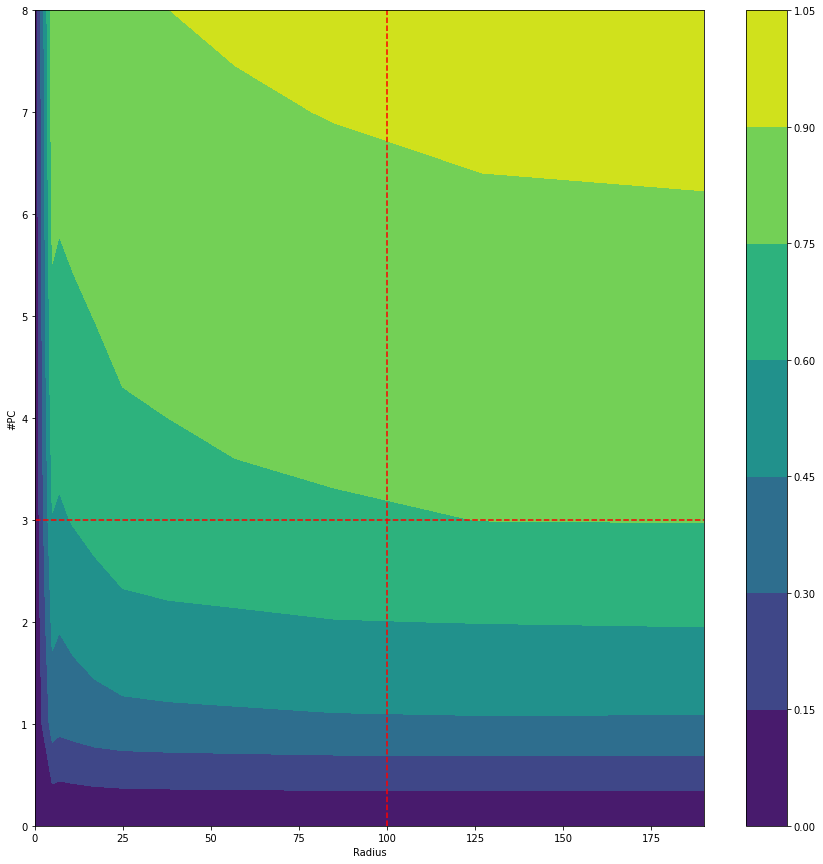

In [67]:
radius_pc_all_variance(expl_var_ratio_gauss)

In [68]:
PC_components = 3
abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method=METHOD, snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)
sites_log = np.log(sites + 1/(np.pi*RADIUS**2))
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites_log)
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
original_axis_log = np.zeros((18, 17))
np.fill_diagonal(original_axis_log, np.array(sites_log).max(0))
original_axis_pc_log = pca_3d.transform(original_axis_log)

0.67% Total Exp. Var.


<IPython.core.display.Javascript object>


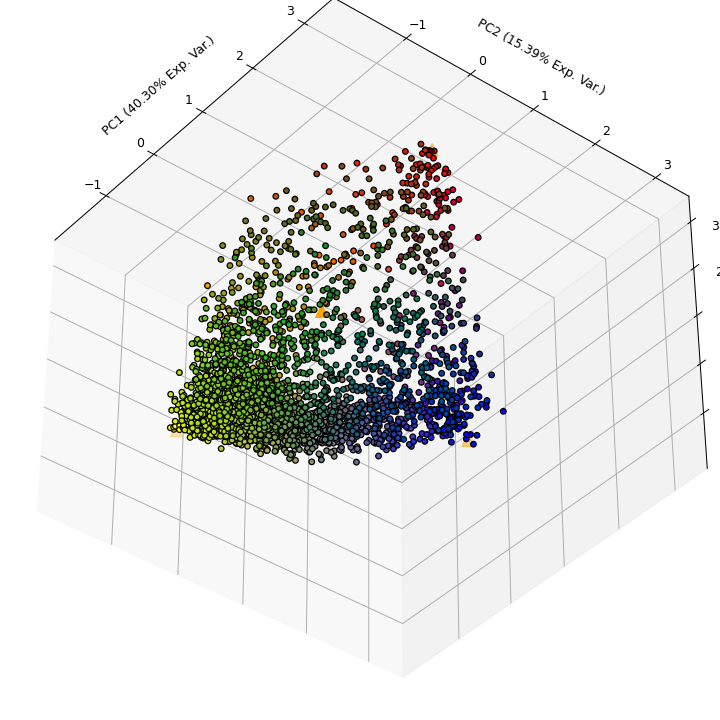

In [69]:
%matplotlib notebook
plt = plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes)
plt.show()

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48]

[-2, -1, 0, 1]


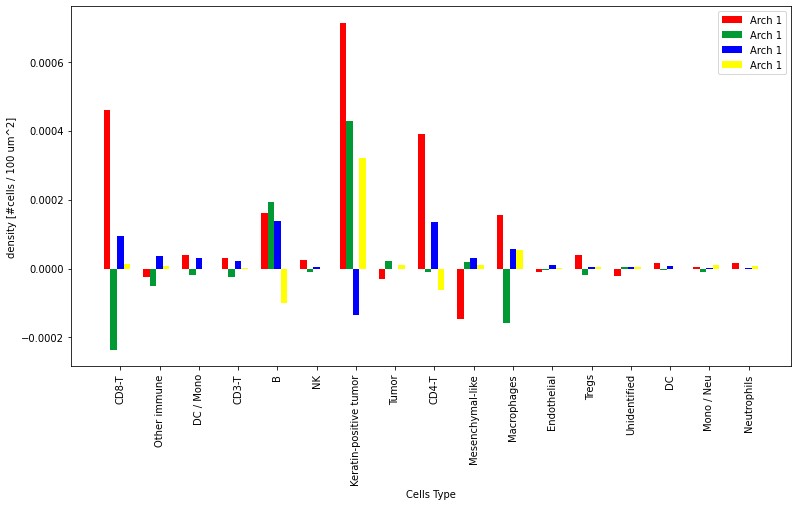

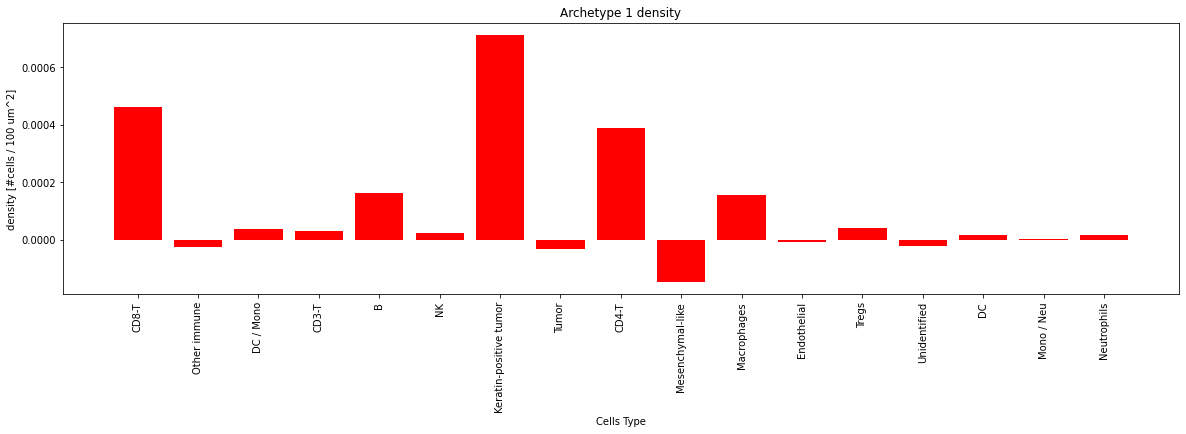

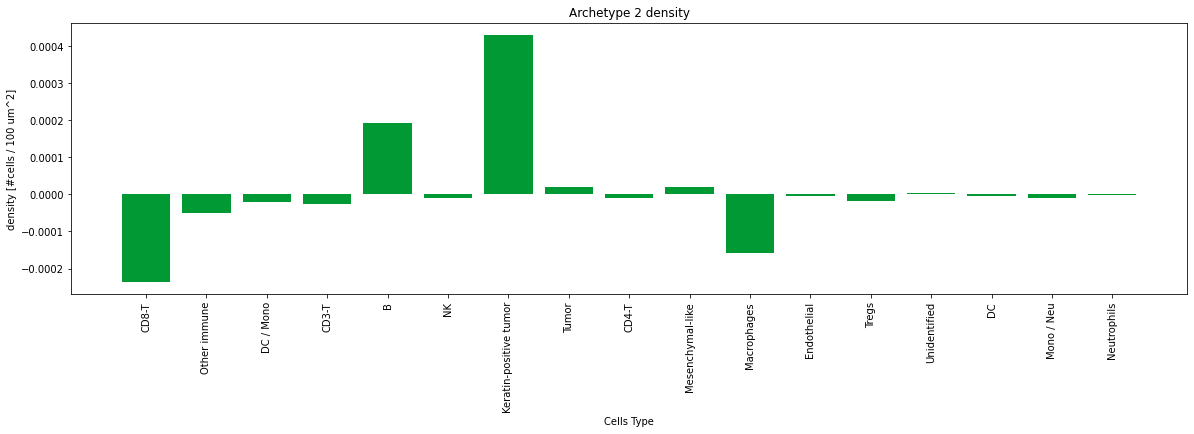

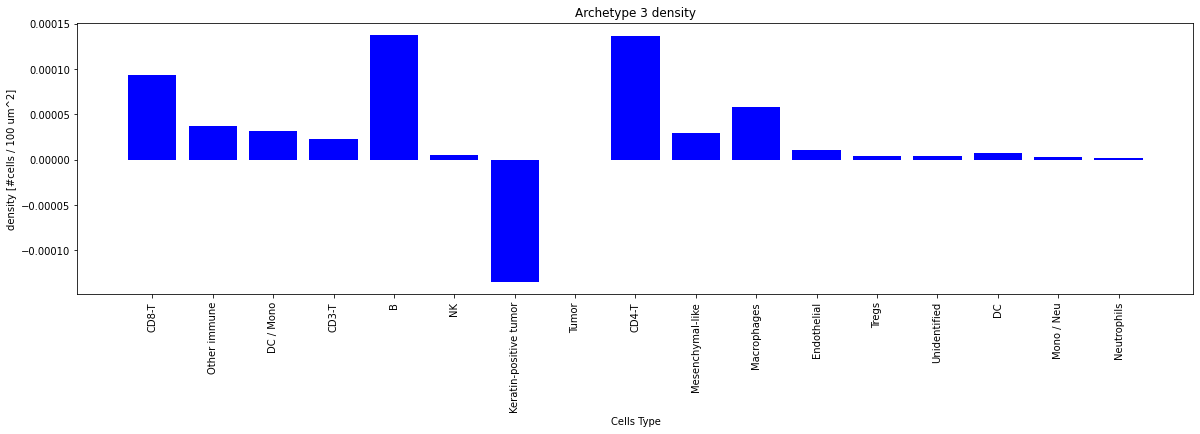

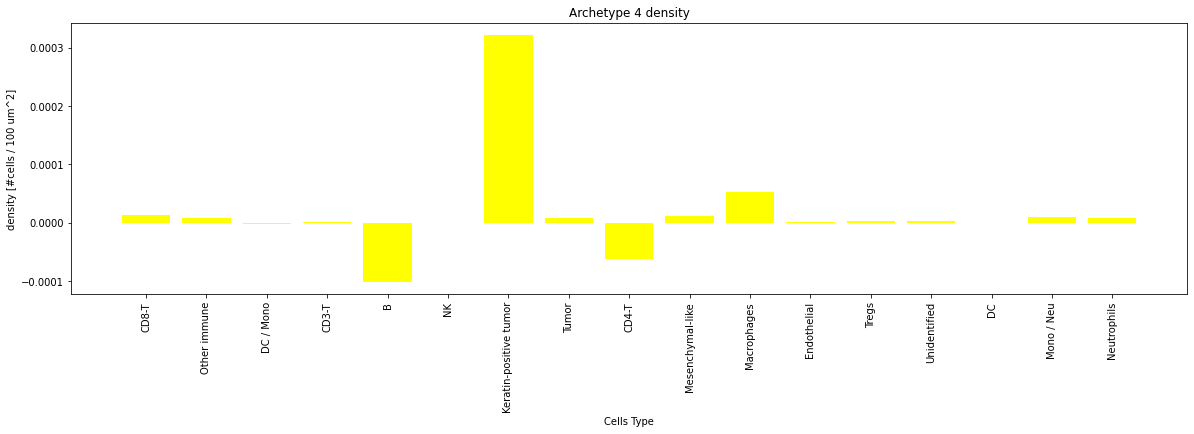

In [30]:
%matplotlib inline
res = np.dot(AA_3D.archetypes.T, pca.components_[:PC_components,:])+np.mean(sites_log, axis=0)
archetype_colors = [[1., 0., 0.], [0. , 0.6, 0.2], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density', radius=RADIUS)